<a href="https://colab.research.google.com/github/phytometrics/plant_phenotyping_python/blob/dev/sam2_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## セットアップ

In [1]:
!pip freeze | grep torch

torch @ https://download.pytorch.org/whl/cu121/torch-2.3.1%2Bcu121-cp310-cp310-linux_x86_64.whl#sha256=f0deb5d2f932a68ed54625ba140eddbf2af22be978ee19b9b63c986add6425b2
torchaudio @ https://download.pytorch.org/whl/cu121/torchaudio-2.3.1%2Bcu121-cp310-cp310-linux_x86_64.whl#sha256=0b423f4ae3356f11f6723e8c77208ac3f9361a4f941e4cc08d86c32c137594bc
torchsummary==1.5.1
torchtext==0.18.0
torchvision @ https://download.pytorch.org/whl/cu121/torchvision-0.18.1%2Bcu121-cp310-cp310-linux_x86_64.whl#sha256=e95ba5a2c616939281e01babf11664d6d1725e81bba57ef81f81c3e57e4d4151


In [1]:
!wget -O SLEAPTrackingData.zip https://zenodo.org/records/5764169/files/SLEAPTrackingData.zip?download=1
!unzip -q SLEAPTrackingData.zip

--2024-08-01 04:17:00--  https://zenodo.org/records/5764169/files/SLEAPTrackingData.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.184.103.159, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92547452 (88M) [application/octet-stream]
Saving to: ‘SLEAPTrackingData.zip’

SLEAPTrackingData.z 100%[===================>]  88.26M   101MB/s    in 0.9s    

2024-08-01 04:17:01 (101 MB/s) - ‘SLEAPTrackingData.zip’ saved [92547452/92547452]



In [2]:
#このセルの実行のあとにセッションの再起動がかかるので、次のセルを実行せずに一旦待つ
!git clone https://github.com/facebookresearch/segment-anything-2.git
%cd segment-anything-2

Cloning into 'segment-anything-2'...
remote: Enumerating objects: 302, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 302 (delta 9), reused 7 (delta 7), pack-reused 280
Receiving objects: 100% (302/302), 42.92 MiB | 16.90 MiB/s, done.
Resolving deltas: 100% (18/18), done.
/content/segment-anything-2


In [3]:
!pip install -e .

Obtaining file:///content/segment-anything-2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu

In [2]:
%cd segment-anything-2
!python setup.py build_ext --inplace

/content/segment-anything-2
running build_ext
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:499: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:418: UserWarning: The detected CUDA version (12.2) has a minor version mismatch with the version that was used to compile PyTorch (12.1). Most likely this shouldn't be a problem.
  warnings.warn(CUDA_MISMATCH_WARN.format(cuda_str_version, torch.version.cuda))
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:428: UserWarning: There are no x86_64-linux-gnu-g++ version bounds defined for CUDA version 12.2
  warnings.warn(f'There are no {compiler_name} version bounds defined for CUDA version {cuda_str_version}')
building 'sam2._C' extension
creating build
creating build/temp.linux-x86_6

In [3]:
%cd /content/segment-anything-2/checkpoints
!./download_ckpts.sh

/content/segment-anything-2/checkpoints
--2024-08-01 04:25:00--  https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.10, 13.227.219.70, 13.227.219.33, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155906050 (149M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2_hiera_tiny.pt’

sam2_hiera_tiny.pt  100%[===================>] 148.68M   214MB/s    in 0.7s    

2024-08-01 04:25:00 (214 MB/s) - ‘sam2_hiera_tiny.pt’ saved [155906050/155906050]

--2024-08-01 04:25:00--  https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.10, 13.227.219.70, 13.227.219.33, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.10|:443... connected.
HTTP request sent, awaiting response... 2

## コード

https://github.com/facebookresearch/segment-anything-2/blob/main/notebooks/video_predictor_example.ipynb

In [4]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# import sys
# sys.path.append("/content/segment-anything-2")

In [5]:
# use bfloat16 for the entire notebook
torch.autocast(device_type="cuda", dtype=torch.bfloat16).__enter__()

if torch.cuda.get_device_properties(0).major >= 8:
    # turn on tfloat32 for Ampere GPUs (https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices)
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True

In [6]:
%cd /content/segment-anything-2/checkpoints
from sam2.build_sam import build_sam2_video_predictor

sam2_checkpoint = "../checkpoints/sam2_hiera_large.pt"
model_cfg = "sam2_hiera_l.yaml"

predictor = build_sam2_video_predictor(model_cfg, sam2_checkpoint)

/content/segment-anything-2/checkpoints


/content/segment-anything-2/sam2/modeling/sam/transformer.py:22: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()


In [14]:
def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

In [8]:
# video to jpgs
!mkdir example
video = "/content/SLEAPTrackingData/movies/SunflowersTopView.avi"
output_dir = "example"
!ffmpeg -i {video} -q:v 2 -start_number 0 {output_dir}/'%05d.jpg'

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

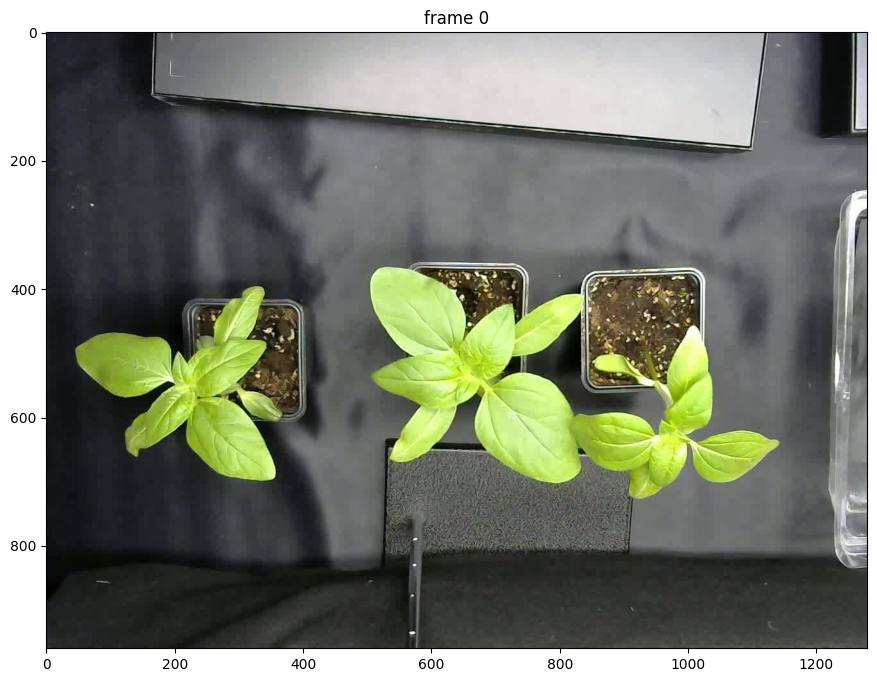

In [9]:
# `video_dir` a directory of JPEG frames with filenames like `<frame_index>.jpg`
video_dir = "example"

# scan all the JPEG frame names in this directory
frame_names = [
    p for p in os.listdir(video_dir)
    if os.path.splitext(p)[-1] in [".jpg", ".jpeg", ".JPG", ".JPEG"]
]
frame_names.sort(key=lambda p: int(os.path.splitext(p)[0]))

# take a look the first video frame
frame_idx = 0
plt.figure(figsize=(12, 8))
plt.title(f"frame {frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[frame_idx])))


Initialize the inference state
SAM 2 requires stateful inference for interactive video segmentation, so we need to initialize an inference state on this video.

During initialization, it loads all the JPEG frames in video_path and stores their pixels in inference_state (as shown in the progress bar below).



In [10]:
inference_state = predictor.init_state(video_path=video_dir)

frame loading (JPEG): 100%|██████████| 90/90 [00:03<00:00, 23.87it/s]


Note: if you have run any previous tracking using this inference_state, please reset it first via reset_state.

(The cell below is just for illustration; it's not needed to call reset_state here as this inference_state is just freshly initialized above.)

In [36]:
predictor.reset_state(inference_state)

To get started, let's try to segment the child on the left.

Here we make a positive click at (x, y) = (210, 350) with label 1, by sending their coordinates and labels into the add_new_points API.

Note: label 1 indicates a positive click (to add a region) while label 0 indicates a negative click (to remove a region).

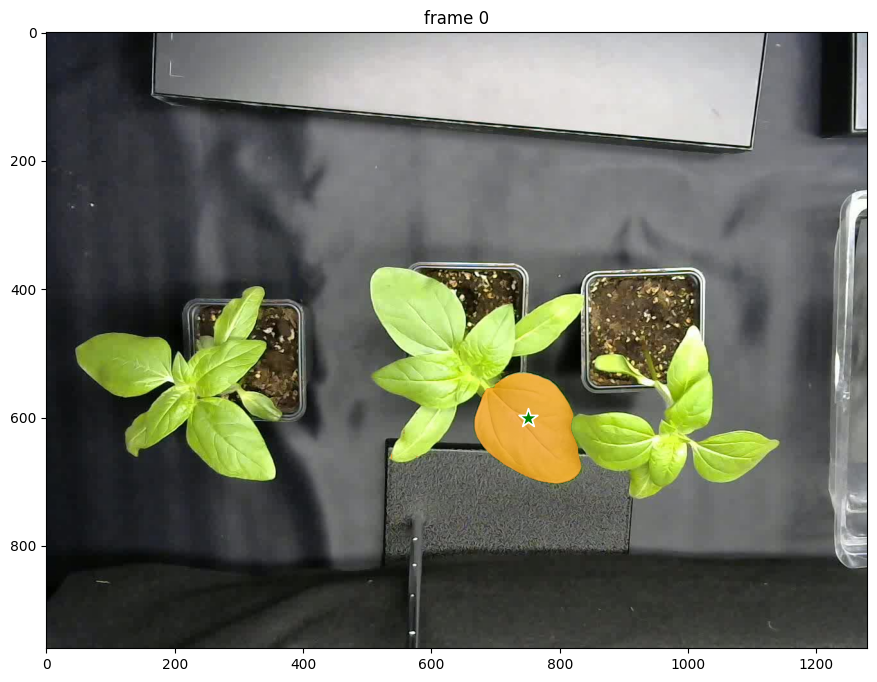

In [38]:
ann_frame_idx = 0  # the frame index we interact with
ann_obj_id = 1  # give a unique id to each object we interact with (it can be any integers)

# Let's add a positive click at (x, y) = (210, 350) to get started
points = np.array([[750,600]], dtype=np.float32)
# for labels, `1` means positive click and `0` means negative click
labels = np.array([1], np.int32)
_, out_obj_ids, out_mask_logits = predictor.add_new_points(
    inference_state=inference_state,
    frame_idx=ann_frame_idx,
    obj_id=ann_obj_id,
    points=points,
    labels=labels,
)

# show the results on the current (interacted) frame
plt.figure(figsize=(12, 8))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
show_points(points, labels, plt.gca())
show_mask((out_mask_logits[0] > 0.0).cpu().numpy(), plt.gca(), obj_id=out_obj_ids[0])

In [39]:
# run propagation throughout the video and collect the results in a dict
video_segments = {}  # video_segments contains the per-frame segmentation results
for out_frame_idx, out_obj_ids, out_mask_logits in predictor.propagate_in_video(inference_state):
    video_segments[out_frame_idx] = {
        out_obj_id: (out_mask_logits[i] > 0.0).cpu().numpy()
        for i, out_obj_id in enumerate(out_obj_ids)
    }


propagate in video: 100%|██████████| 90/90 [01:44<00:00,  1.16s/it]


In [19]:
def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

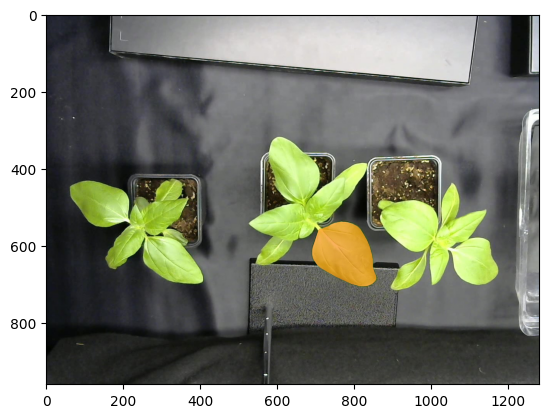

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
# for out_obj_id, out_mask in video_segments[out_frame_idx].items():
#         show_mask(out_mask, plt.gca(), obj_id=out_obj_id)

fig, ax = plt.subplots()

def animate(frame_idx):
    ax.clear()
    plt.imshow(Image.open(os.path.join(video_dir, frame_names[frame_idx])))
    for out_obj_id, out_mask in video_segments[frame_idx].items():
        show_mask(out_mask, ax, obj_id=out_obj_id)

ani = animation.FuncAnimation(fig, animate, frames=len(video_segments), repeat=False)

ani.save('output.mp4', writer='ffmpeg')
plt.show()

In [ ]:

# render the segmentation results every few frames
vis_frame_stride = 15
plt.close("all")
for out_frame_idx in range(0, len(frame_names), vis_frame_stride):
    # plt.figure(figsize=(6, 4))
    # plt.title(f"frame {out_frame_idx}")
    # plt.imshow(Image.open(os.path.join(video_dir, frame_names[out_frame_idx])))
    for out_obj_id, out_mask in video_segments[out_frame_idx].items():
        show_mask(out_mask, plt.gca(), obj_id=out_obj_id)
    break